In [63]:
pip install Basemap

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

from mpl_toolkits.basemap import Basemap
from collections import OrderedDict
import datetime

print("All libraries are successfully installed and imported!")


All libraries are successfully installed and imported!


In [26]:
import warnings

# Ignorer les avertissements
warnings.filterwarnings('ignore')

# Prédiction des Retards au Départ des Vols: Approches Machine Learning et Deep Learning 

## <font color='#922B21'>Our Aim </font>

Les retards de vol sont une réalité fréquente dans le secteur de l'aviation, affectant les compagnies aériennes, les aéroports, et surtout les passagers. La capacité de prédire ces retards avec précision représente un enjeu crucial pour l'amélioration de la satisfaction des clients, l'optimisation des opérations aériennes et la réduction des coûts opérationnels.

Dans ce projet nous allons développer des modèles de prédiction pour estimer les retards au départ des vols **DepDelay** en utilisant deux approches différentes : une approche basée sur le Machine Learning en utilisant des features exogènes, et une approche basée sur les séries temporelles en utilisant uniquement la série chronologique de **DepDelay.**

## <font color='#922B21'>Plan </font>

* **Let's greet the data : Data Importation**
* **Data Cleaning: handling missing values and duplicates**
* **Exploratory Data Analysis**
* **feature ingenering**
* **Modeling**

## <font color='#922B21'> Part 1: Let's Greet the Data </font>

**Signification des variables**

| Catégorie                  | Variable          | Description                                                                                                          |
|----------------------------|-------------------|----------------------------------------------------------------------------------------------------------------------|
| **Informations temporelles**    |                   |                                                                                                                      |
|                            | Year              | Année du vol.                                                                                                        |
|                            | Month             | Mois du vol (de 1 à 12).                                                                                             |
|                            | DayofMonth        | Jour du mois (de 1 à 31).                                                                                            |
|                            | DayOfWeek         | Jour de la semaine (de 1 à 7, où 1 est lundi et 7 est dimanche).                                                      |
|                            | DepTime           | Heure locale de départ réelle (au format HHMM, par exemple 1230 pour 12:30 PM).                                              |
|                            | CRSDepTime        | Heure local de départ prévue selon l'horaire (au format HHMM).                                                              |
|                            | ArrTime           | Heure local d'arrivée réelle (au format HHMM).                                                                             |
|                            | CRSArrTime        | Heure local d'arrivée prévue selon l'horaire (au format HHMM).                                                              |
| **Informations sur le vol**     |                   |                                                                                                                      |
|                            | UniqueCarrier     | Code unique du transporteur aérien.                                                                             |
|                            | FlightNum         | Numéro du vol.                                                                                                       |
|                            | TailNum           | Numéro de la queue de l'avion (identifiant unique de l'avion).                                                      |
| **Durée et retard**             |                   |                                                                                                                      |
|                            | ActualElapsedTime| Temps total réel du vol en minutes. Si le vol est annulé ou dévié, cette valeur est manquante.                      |
|                            | CRSElapsedTime    | Temps total prévu du vol en minutes selon l'horaire.                                                                 |
|                            | AirTime           | Temps passé dans les airs en minutes. Si le vol est annulé ou dévié, cette valeur est manquante.                   |
|                            | ArrDelay          | Retard à l'arrivée en minutes. Une valeur negative indique que le vol est arrivé plus tot que prévue . Si le vol est annulé, cette valeur est manquante.                                    |
|                            | DepDelay          | Retard au départ en minutes.Une valeur négative indique que le vol est parti plus tôt  que prévu. Si le vol est annulé, cette valeur est manquante.                                      |
| **Informations géographiques**  |                   |                                                                                                                      |
|                            | Origin            | Code de l'aéroport d'origine(codes IATA)                                                                                       |
|                            | Dest              | Code de l'aéroport de destination.                                                                                   |
|                            | Distance          | Distance entre l'aéroport d'origine et l'aéroport de destination en miles.                                           |
| **Informations sur le roulage** |                   |                                                                                                                      |
|                            | TaxiIn            | Temps de roulage après l'atterrissage, en minutes.                                                                   |
|                            | TaxiOut           | Temps de roulage avant le décollage, en minutes.                                                                     |
| **Statut du vol**               |                   |                                                                                                                      |
|                            | Cancelled         | Indicateur d'annulation du vol (1 si le vol est annulé, 0 sinon).                                                     |
|                            | CancellationCode  | Code indiquant la raison de l'annulation (A:Transporteur,B : Météo, C : Système national de l'espace aérien (NAS), D : Sécurité). |
|                            | Diverted          |  signifie qu'un vol a été dévié de sa trajectoire prévue vers un autre aéroport que celui initialement prévu pour l'atterrissage(1 si le vol est dévié, 0 sinon).                                                     |
| **Détails des retards**         |                   |                                                                                                                      |
|                            | CarrierDelay      | Retard dû au transporteur, en minutes.                                                                               |
|                            | WeatherDelay      | Retard dû aux conditions météorologiques,comme des Conditions météorologiques dangereuses qui sont prévues ou se manifestent au point de départ, en route ou au point d'arrivée (en minutes).                                                                |
|                            | NASDelay          | Retard dû au système national de l'espace aérien (NAS), en minutes.                                                   |
|                            | SecurityDelay     | Retard dû aux contrôles de sécurité, en minutes.                                                                     |
|                            | LateAircraftDelay| Retard dû à l'arrivée tardive de l'aéronef, en minutes.                                                              |


Le mappage des codes du variable **UniqueCarrier** est le suivant:

| Code  | ligne Aérien               |
|-------|---------------------------------|
| UA    | United Air Lines Inc.           |
| AA    | American Airlines Inc.          |
| US    | US Airways Inc.                 |
| HP    |America West Airlines            |
| AS    | Alaska Airlines Inc.            |
| CO    | Continental Airlines            |
| WN    | Southwest Airlines Co.          |
| DL    | Delta Air Lines Inc.            |
| TW    | Trans World Airlines            |
| NW    | Northwest Airline               |


Nous allons créer un dataframe intitulé airoport qui contient le mappage entre le code de la compagnie aèrienne et son son complet. Ceci peut être utilisé plus tard 

In [27]:
# Création du dictionnaire avec les données des compagnies aériennes
import pandas as pd

# Création du dictionnaire avec les données des compagnies aériennes
abreviation_lignes_aeriennes = {
    'Code': ['UA', 'AA', 'US', 'HP', 'AS', 'CO', 'WN', 'DL', 'TW', 'NW'],
    'ligne Aérien': ['United Air Lines Inc.', 'American Airlines Inc.', 'US Airways Inc.', 'America West Airlines',
                     'Alaska Airlines Inc.', 'Continental Airlines', 'Southwest Airlines Co.', 'Delta Air Lines Inc.',
                     'Trans World Airlines', 'Northwest Airline']
}

# Création du DataFrame à partir du dictionnaire
lignes_aeriennes = pd.DataFrame(abreviation_lignes_aeriennes)

**Importation des données et information correspondantes**

In [28]:
data = pd.read_csv("data.csv", sep=';')
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2000,1,28,5,1647.0,1647,1906.0,1859,HP,154,...,15,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2000,1,29,6,1648.0,1647,1939.0,1859,HP,154,...,5,47,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2000,1,30,7,NaN,1647,NaN,1859,HP,154,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2000,1,31,1,1645.0,1647,1852.0,1859,HP,154,...,7,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2000,1,1,6,842.0,846,1057.0,1101,HP,609,...,3,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2000,3,15,3,1132.0,1127,1248.0,1252,TW,583,...,2,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1048571,2000,3,16,4,1132.0,1127,1252.0,1252,TW,583,...,3,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1048572,2000,3,17,5,1125.0,1127,1243.0,1252,TW,583,...,2,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1048573,2000,3,18,6,1126.0,1127,1241.0,1252,TW,583,...,5,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**Informations à-propos propos les données**

* D'après la visualisation des données precendente, on déduit que les données on étaient collectées pour des aèroports américains entre le 1 janvier 2000 et le 31 mars 2000

* On va afficher un resumé informatif de notre Dataframe pour avoir une idée sur la taille du data , le type de chaque feature et vérifier les nombres de valeurs non nulls dans chaque colonne

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1048575 non-null  int64  
 1   Month              1048575 non-null  int64  
 2   DayofMonth         1048575 non-null  int64  
 3   DayOfWeek          1048575 non-null  int64  
 4   DepTime            1005988 non-null  float64
 5   CRSDepTime         1048575 non-null  int64  
 6   ArrTime            1003334 non-null  float64
 7   CRSArrTime         1048575 non-null  int64  
 8   UniqueCarrier      1048575 non-null  object 
 9   FlightNum          1048575 non-null  int64  
 10  TailNum            1048575 non-null  object 
 11  ActualElapsedTime  1003334 non-null  float64
 12  CRSElapsedTime     1048540 non-null  float64
 13  AirTime            1003334 non-null  float64
 14  ArrDelay           1003334 non-null  float64
 15  DepDelay           1005988 non-n

Notre dataframe est formé par 1 048 575 lignes et 29 colonnes dont  les colonnes **CancellationCode,** et les cinq colonnes relatives aux details des retards **CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay** sont tous nulles.

On remarque aussi que on a 16 colonnes sur 23 colonnes restant qui sont entièrement remplies .Ces colonnes sont les suivants:
 -**Year, Month, DayofMonth, DayOfWeek** : Informations temporelles sur le vol.
 
 -**CRSDepTime, CRSArrTime** : Heures de départ et d'arrivée prévues.
 
 -**UniqueCarrier, FlightNum, TailNum** : Identifiants du vol et de l'avion.
 
 -**Origin, Dest** : Aéroports d'origine et de destination.
 
 -**Distance** : Distance du vol en miles.
 
 -**TaxiIn, TaxiOut** : Temps de roulage à l'arrivée et au départ.
 
 -**Cancelled** : Indicateur si le vol est annulé.
 
-**Diverted** : Indicateur si le vol est dévié.

* Pour avoir une vue d'ensemble de la zone géographique couverte dans cet ensemble de données, nous allons tracer la localisation des aéroports en utilisant la bibliothèque de traçage bibliographique **basemap** et indiquer le nombre de vols enregistrés. 

Le dataframe airports qui contient des informations sur les coordonnées geographique des aeroports américans qui existe pendant va nous servir aussi .


In [30]:
airports = pd.read_csv("airports.csv")
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


## <font color='#922B21'>Part 2: Pre‑processing data </font>

La phase de pré-traitement élimine les données non pertinentes et conserve uniquement les données essentielles et pertinentes. Les données sont organisées et préparées en supprimant les doublons et les valeurs manquantes, les valeurs nulles étant éliminées, et les vols annulés sont également supprimés.

Pour préserver les données originales, nous allons créer une copie sur laquelle nous allons travailler.

In [31]:
data_clean=data.copy()

## <font color='  #d98880'>2.1. Removing Duplicates

Supprimer les doublons du jeu de données est crucial car ils peuvent fausser les analyses statistiques et les performances du modèle en augmentant certaines observations. Éliminer les doublons garantit l'intégrité et la précision des données, conduisant à des insights plus fiables et significatifs dans les projets d'analyse de données. Alors, supprimons-les !

La ligne ci-dessous supprime les lignes dupliquées du DataFrame `data_clean` en se basant sur toutes les colonnes (`subset=None`). Elle garde la première occurrence de chaque ligne dupliquée (`keep='first'`) et modifie le DataFrame directement (`inplace=True`), ce qui signifie que les changements sont appliqués directement à `data_clean` plutôt que de créer un nouveau DataFrame

In [32]:
data_clean.drop_duplicates(subset=None, keep='first', inplace=True)

In [33]:
data_clean.shape

(1048575, 29)

Nice! on remarque que notre data avec sa grande taille ne contient pas de lignes dupliquées

## <font color='  #d98880'>2.2. Handling missing values

### - dropping rows with Cancelled flights

Les vols annulés ne présentent pas de retard de départ, ce qui en fait une des principales raisons de les exclure des analyses de retards

In [34]:
data_clean = data_clean[data_clean['Cancelled'] != 1]
data_clean.shape

(1005988, 29)

In [35]:
print("le pourcentage de données qui reprentent des vols annulées est de   ",round((1048575 - 1005988) / 1048575 * 100, 2), '%')

le pourcentage de données qui reprentent des vols annulées est de    4.06 %


La colonne cancelled ne contient que des 0 maintenant , elle ne va pas appoter aucune information .donc on peut la supprimer

In [36]:
data_clean = data_clean.drop(columns=['Cancelled'])

### - Les colonnes:  CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay 


Dans la partie précendente on a trouvé 6 colonnes entièrement vides donc nous allons les suppprimer

In [37]:
columns_to_drop = [
    'CancellationCode', 'CarrierDelay', 'WeatherDelay',
    'NASDelay', 'SecurityDelay', 'LateAircraftDelay'
]
data_clean = data_clean.drop(columns=columns_to_drop)

### - Reste des colonnes avec valeurs manquantes

Le code suivant nous donnent les colonnes qui contiennent les valeurs manquantes 

In [38]:
# Liste des colonnes avec des valeurs manquantes
# Liste des colonnes avec des valeurs manquantes
colonnes_avec_valeurs_manquantes = data_clean.columns[data_clean.isnull().any()]
colonnes_avec_valeurs_manquantes

Index(['ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay'],
      dtype='object')

**Calculons le pourcentages des valeurs manquantes dans chacun de ces colonnes**

ArrTime              0.263820
ActualElapsedTime    0.263820
CRSElapsedTime       0.000099
AirTime              0.263820
ArrDelay             0.263820
dtype: float64


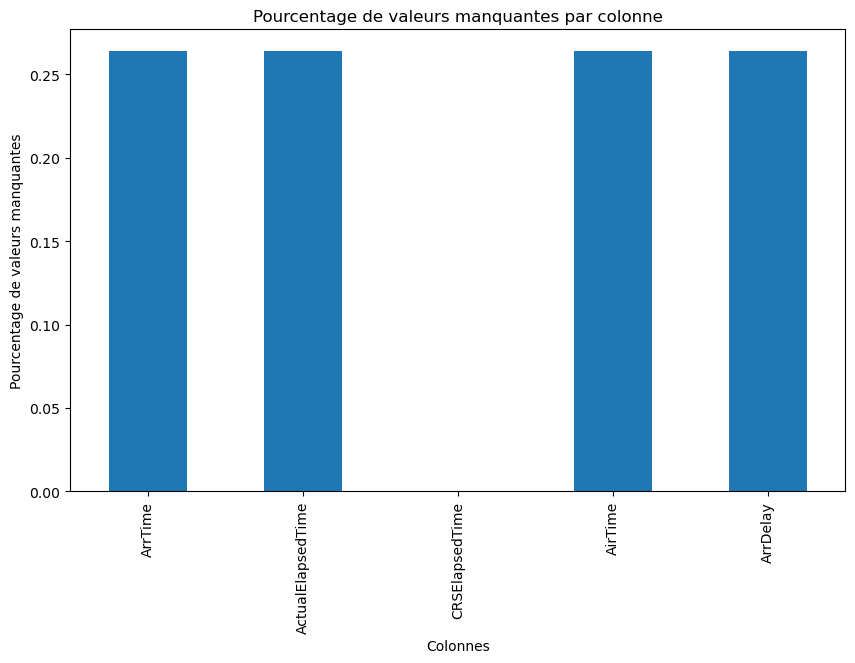

In [39]:
# Calcul du nombre de valeurs manquantes pour chaque colonne
nombre_valeurs_manquantes_par_colonne = data_clean[colonnes_avec_valeurs_manquantes].isnull().sum()

# Calcul du pourcentage de valeurs manquantes pour chaque colonne
pourcentage_valeurs_manquantes_par_colonne = (nombre_valeurs_manquantes_par_colonne / len(data_clean)) * 100

print(pourcentage_valeurs_manquantes_par_colonne)

# Configuration de la taille du graphique
plt.figure(figsize=(10, 6))

# Création du graphique à barres
pourcentage_valeurs_manquantes_par_colonne.plot(kind='bar')

# Ajout de titres et d'étiquettes
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de valeurs manquantes')

# Affichage du graphique
plt.show()


* Le pourcentage des valeur manquentes pour CRSElapsedTime est très très faible (presque nul). La meilleur solution est de supprimer ces lignes

In [40]:
data_clean = data_clean.dropna(subset=['CRSElapsedTime'])
data_clean.shape

(1005987, 22)

* On voit aussi que le pourcentage totale des lignes avec des valeurs manquantes ne dépasse pas le 1% ce qui met le dropping le meilleur choix pour les gérer! le pourcentage se suppression des données peut etre meme inferieur s'il existe certaines corrélations entre ces valeurs manquantes

Le code suivant nous permet de supprimer le reste des lignes qui contiennet des valeurs manquantes

In [41]:
data_clean = data_clean.dropna()
data_clean.shape

(1003334, 22)

In [42]:
print('Le taux des lignes supprimées est de', round((1005987 - 1003334) / 1005987 * 100, 2), '%')

Le taux des lignes supprimées est de 0.26 %


Puisque le taux de suppression de la reste de ces lignes est de 0.26% qui est une valeure qui montrent qu'il existe une correlation très forte vue parfaite entre les valeurs manquantes

In [43]:
print('Le taux totale des lignes supprimées est de', round((1048575 - 1003334) / 1048575 * 100, 2), '%')

Le taux totale des lignes supprimées est de 4.31 %


## <font color='  #d98880'>2.3. Processing the date

Dans la base de données la date est répartie sur 3 colonne qui n'est pas pratique .Donc on va regouper les 3 colonne `Year`,`Month` et `DayOfMonth` dans une seule colonne avec le format date en python

In [44]:
# Renommer la colonne 'DayofMonth' en 'Day'
data_clean.rename(columns={'DayofMonth': 'Day'}, inplace=True)
# Combiner les colonnes 'Year', 'Month' et 'Day' en un objet datetime
data_clean['Date'] = pd.to_datetime(data_clean[['Year', 'Month', 'Day']])
# Supprimer les colonnes 'Year', 'Month' et 'Day'
data_clean.drop(columns=['Year'], inplace=True)

## <font color='  #d98880'>2.4. Processing les heures

Les heures dans le data frame sont tous aux forme d'un nombre flottant ou int où les deux premiers chiffres indiquent l'heure et les deux derniers, les minutes. Ce format n'est pas pratique et nous allons les convertir donc.

Nous allons d'abord définir la fonction suivante qui nous permet de convertir les 4 colonnes temps (`DepTime,ArrTime,CRSDepTime,CRSArrTime`) au format time HH:MM:SS

In [45]:
from datetime import time

# Fonction pour convertir l'heure en format time avec vérification des valeurs valides
def convert_to_time(df, col_name):
    col = df[col_name].dropna().astype(int).astype(str).str.zfill(4)
    hours = col.str[:2].astype(int)
    minutes = col.str[2:].astype(int)
    
    times = []
    for h, m in zip(hours, minutes):
        if 0 <= h < 24 and 0 <= m < 60:
            times.append(time(h, m))
        else:
            times.append(None)  # Utiliser None pour les valeurs invalides
    
    df[col_name + '_time'] = pd.Series(times, index=df[col_name].dropna().index)


In [46]:

# Appliquer uniquement aux colonnes horaires
time_columns = ['DepTime', 'ArrTime', 'CRSDepTime', 'CRSArrTime']
for col in time_columns:
    convert_to_time(data_clean, col)

# Supprimer les anciennes colonnes
columns_to_drop = time_columns
data_clean.drop(columns=columns_to_drop, inplace=True)

# Renommer les colonnes
new_column_names = {
    'DepTime_time': 'DepTime',
    'ArrTime_time': 'ArrTime',
    'CRSDepTime_time': 'CRSDepTime',
    'CRSArrTime_time': 'CRSArrTime'
}
data_clean.rename(columns=new_column_names, inplace=True)


## <font color='  #d98880'>2.5. La colonne Diverted

La colonne `Diverted`presente des valeurs cas très rare pour la quelle l'avion dévie de sa chemin ou se trouve obligé a se débarquer dans un autre aèroport autre que celui de la destination avant de continuer son vol vers sa destination. Pour cela nous allons découvrir s'il existe des cas de vol dévie  `Diverted=1` nous supprimons les lignes correspondant en cas d'existance puisqu'il represente des outliers puis supprimer cette colonne puisqu'elle n'est plus informative

In [47]:
diverted_values = data_clean['Diverted'].unique()
print("Valeurs uniques dans la colonne 'Diverted':", diverted_values)

Valeurs uniques dans la colonne 'Diverted': [0]


Puisqu'il n'existe pas des cas pourlequel les avions ont dévié nous allons supprimons directement cette colonne

In [48]:
data_clean.drop(columns=['Diverted'], inplace=True)

## <font color='  #d98880'>2.6. Les colonnes TaxiIN et ArrTime et CRSArrTime et ArrDelay 

les données reliés du temps d'arrivé, temps de roulage après atterissement,temps d'arrivé prévue non aucune relation sur la prédiction du temps de départ. Il sont non informatif donc on va le éliminer de notre dataframe

In [49]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['TaxiIn', 'ArrTime', 'CRSArrTime','ArrDelay']

# Supprimer les colonnes de la liste
data_clean = data_clean.drop(columns=colonnes_a_supprimer)

In [50]:
data_clean

,Month,Day,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiOut,Date,DepTime,CRSDepTime
0,1,28,5,HP,154,N808AW,259.0,252.0,233.0,0.0,ATL,PHX,1587,11,2000-01-28,16:47:00,16:47:00
1,1,29,6,HP,154,N653AW,291.0,252.0,239.0,1.0,ATL,PHX,1587,47,2000-01-29,16:48:00,16:47:00
3,1,31,1,HP,154,N806AW,247.0,252.0,226.0,-2.0,ATL,PHX,1587,14,2000-01-31,16:45:00,16:47:00
4,1,1,6,HP,609,N158AW,255.0,255.0,244.0,-4.0,ATL,PHX,1587,8,2000-01-01,08:42:00,08:46:00
5,1,2,7,HP,609,N656AW,299.0,255.0,267.0,3.0,ATL,PHX,1587,24,2000-01-02,08:49:00,08:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3,15,3,TW,583,N979Z,76.0,85.0,60.0,5.0,STL,LNK,370,14,2000-03-15,11:32:00,11:27:00
1048571,3,16,4,TW,583,N983Z,80.0,85.0,57.0,5.0,STL,LNK,370,20,2000-03-16,11:32:00,11:27:00
1048572,3,17,5,TW,583,N996Z,78.0,85.0,58.0,-2.0,STL,LNK,370,18,2000-03-17,11:25:00,11:27:00
1048573,3,18,6,TW,583,N982PS,75.0,85.0,59.0,-1.0,STL,LNK,370,11,2000-03-18,11:26:00,11:27:00


## <font color='  #d98880'>2.7. Les variables `AirTime, CRSElapsedTime `et `ActualElapsedTime` 

ces variables n'ont pas de relations naturels avec le retrard de dépard mais plus tot au retard d'arrivé donc on va les supprimer

In [51]:
# Liste des variables à supprimer
variables_a_supprimer = ['AirTime', 'CRSElapsedTime', 'ActualElapsedTime']

# Supprimer les variables du dataframe
data_clean.drop(variables_a_supprimer, axis=1, inplace=True)

In [52]:
data_clean

,Month,Day,DayOfWeek,UniqueCarrier,FlightNum,TailNum,DepDelay,Origin,Dest,Distance,TaxiOut,Date,DepTime,CRSDepTime
0,1,28,5,HP,154,N808AW,0.0,ATL,PHX,1587,11,2000-01-28,16:47:00,16:47:00
1,1,29,6,HP,154,N653AW,1.0,ATL,PHX,1587,47,2000-01-29,16:48:00,16:47:00
3,1,31,1,HP,154,N806AW,-2.0,ATL,PHX,1587,14,2000-01-31,16:45:00,16:47:00
4,1,1,6,HP,609,N158AW,-4.0,ATL,PHX,1587,8,2000-01-01,08:42:00,08:46:00
5,1,2,7,HP,609,N656AW,3.0,ATL,PHX,1587,24,2000-01-02,08:49:00,08:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3,15,3,TW,583,N979Z,5.0,STL,LNK,370,14,2000-03-15,11:32:00,11:27:00
1048571,3,16,4,TW,583,N983Z,5.0,STL,LNK,370,20,2000-03-16,11:32:00,11:27:00
1048572,3,17,5,TW,583,N996Z,-2.0,STL,LNK,370,18,2000-03-17,11:25:00,11:27:00
1048573,3,18,6,TW,583,N982PS,-1.0,STL,LNK,370,11,2000-03-18,11:26:00,11:27:00


## <font color='  #d98880'>2.8. La variables `FlightNum` 

la variable FlightNum est un identifiant qui résume certaine information sur le vol. Ces information sont trouvés dans les autres variables.   Ceci est plus facile pour les modèle de machine learning de les extraires. Donc on peut eliminer cette colonne

In [53]:
# Supprimer la colonne FlightNum
data_clean = data_clean.drop(columns=['FlightNum'])

## <font color='  #d98880'>2.9. La variables `Distance` 

la variable distance n'a aucune relation sur le retard de dépard donc on va la supprimer 

In [54]:
data_clean = data_clean.drop(columns=['Distance'])

## <font color='  #d98880'>2.9. La variables `DepTime` 

la temps de depart est déductible à partir du temps prévue de dépard et du retard de dépard lui meme donc on va la supprimer

In [55]:
data_clean = data_clean.drop(columns=['DepTime'])

In [56]:
data_clean.head()

,Month,Day,DayOfWeek,UniqueCarrier,TailNum,DepDelay,Origin,Dest,TaxiOut,Date,CRSDepTime
0,1,28,5,HP,N808AW,0.0,ATL,PHX,11,2000-01-28,16:47:00
1,1,29,6,HP,N653AW,1.0,ATL,PHX,47,2000-01-29,16:47:00
3,1,31,1,HP,N806AW,-2.0,ATL,PHX,14,2000-01-31,16:47:00
4,1,1,6,HP,N158AW,-4.0,ATL,PHX,8,2000-01-01,08:46:00
5,1,2,7,HP,N656AW,3.0,ATL,PHX,24,2000-01-02,08:46:00


In [57]:
from IPython.display import FileLink
# Enregistrer le dataframe au format CSV
data_clean.to_csv("data_clean.csv", index=False)

# Afficher le lien de téléchargement
FileLink("data_clean.csv")


C:\Users\Lenovo\data_clean.csv

## <font color='#922B21'>Part 3:Exploratory Data Analysis </font>

## <font color='  #d98880'>3.1. Distribution du retard de départ`DepDelay` 

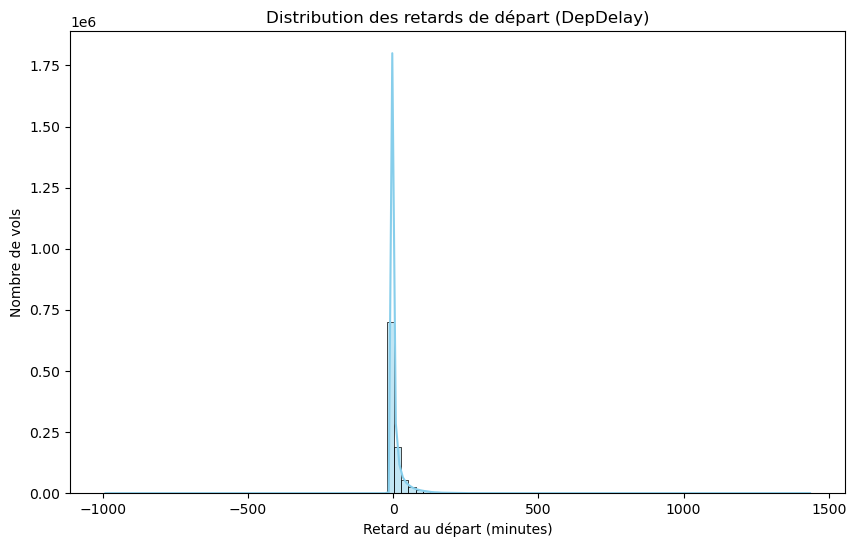

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['DepDelay'], bins=100, kde=True, color='skyblue')
plt.title('Distribution des retards de départ (DepDelay)')
plt.xlabel('Retard au départ (minutes)')
plt.ylabel('Nombre de vols')
plt.show()

la distribution des retards de départ peut etre modélisé avec une loi exponentielle $f(x)=aexp(−x/b)$ avec $a$ et $b$ sont les paramètres du modèle

## <font color='  #d98880'>3.2. Visualisation des caractéristiques statiqtiques des retards de depard `DepDelay` en fonction des jours de la semaine `DayOfWeek `

Le code suivant générera un box plot qui montre la médiane, les quartiles, les valeurs aberrantes et la distribution des retards de départ pour chaque jour de la semaine

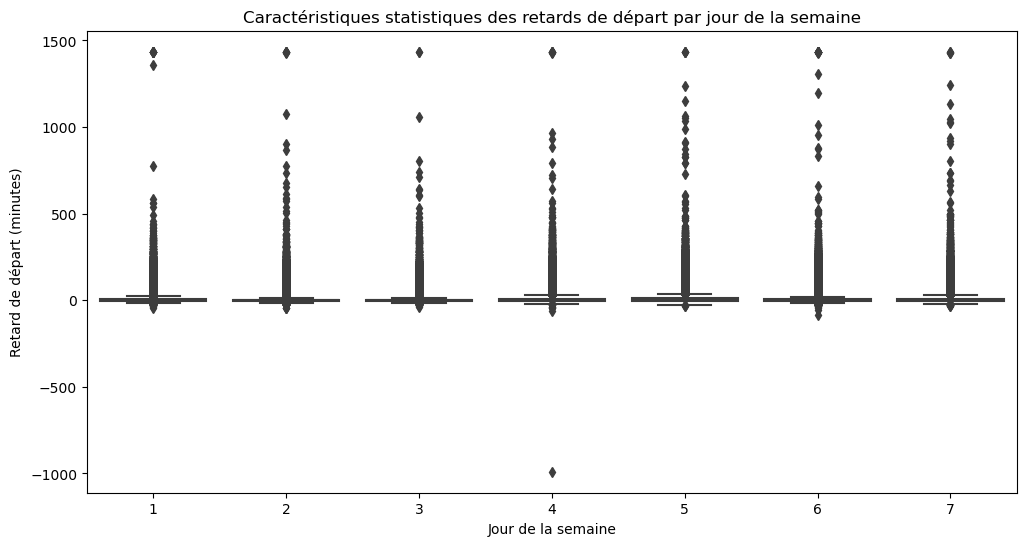

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='DepDelay', data=data_clean)
plt.title('Caractéristiques statistiques des retards de départ par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Retard de départ (minutes)')
plt.show()


On remarque que la dissribution du retard de départ différe selon les jours de la semaine

## <font color='  #d98880'>3.3. les lignes aèriennes `UniqueCarrier` et leur ponctualité

**Distribution des vols pour chaque  ligne aèrien `UniqueCarrier`**

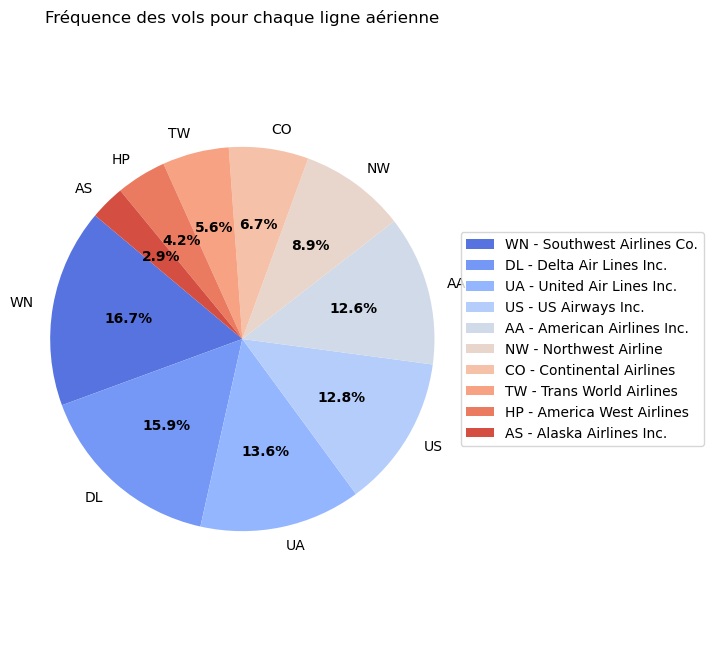

In [60]:

# Calculer la fréquence des vols pour chaque ligne aérienne
donnees_frequence_vols = data_clean['UniqueCarrier'].value_counts().reset_index()
donnees_frequence_vols.columns = ['UniqueCarrier', 'Frequence']

# Fusionner avec le DataFrame lignes_aeriennes pour obtenir les noms complets des lignes aériennes
donnees_frequence_vols = pd.merge(donnees_frequence_vols, lignes_aeriennes, left_on='UniqueCarrier', right_on='Code')

# Calculer la fréquence totale des vols
frequence_totale = donnees_frequence_vols['Frequence'].sum()

# Calculer les proportions de chaque ligne aérienne
donnees_frequence_vols['Proportion'] = donnees_frequence_vols['Frequence'] / frequence_totale

# Créer le pie chart
plt.figure(figsize=(12, 8))
ax = plt.subplot(1, 2, 1)

# Utiliser la palette "coolwarm" de Seaborn pour les couleurs
colors = sns.color_palette("coolwarm", n_colors=len(donnees_frequence_vols))

# Pie chart
wedges, texts, autotexts = ax.pie(donnees_frequence_vols['Proportion'], labels=donnees_frequence_vols['UniqueCarrier'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.setp(autotexts, size=10, weight="bold")

# Légende
legend_rects = []
for code, airline, color in zip(donnees_frequence_vols['UniqueCarrier'], donnees_frequence_vols['ligne Aérien'], colors):
    legend_rects.append(plt.Rectangle((0, 0), 1, 1, fc=color, edgecolor='none'))
ax.legend(legend_rects, donnees_frequence_vols['UniqueCarrier'] + ' - ' + donnees_frequence_vols['ligne Aérien'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Fréquence des vols pour chaque ligne aérienne')

plt.axis('equal')

plt.show()

A partir de ce piechart on peut faire des observations sur la dynamiques du marché aèrien americain pour l'année 2000 entre janvier et mars.On peut conclure que les cinq premières compagnies aériennes (WN, DL, UA, US, AA) représentent ensemble plus de 70% des vols, ce qui indique une concentration significative du marché autour de quelques grandes compagnies.

**Description statistique des retards au dépard des vols `DepDelay` groupés par ligne aeèrien `UniqueCarrier`**

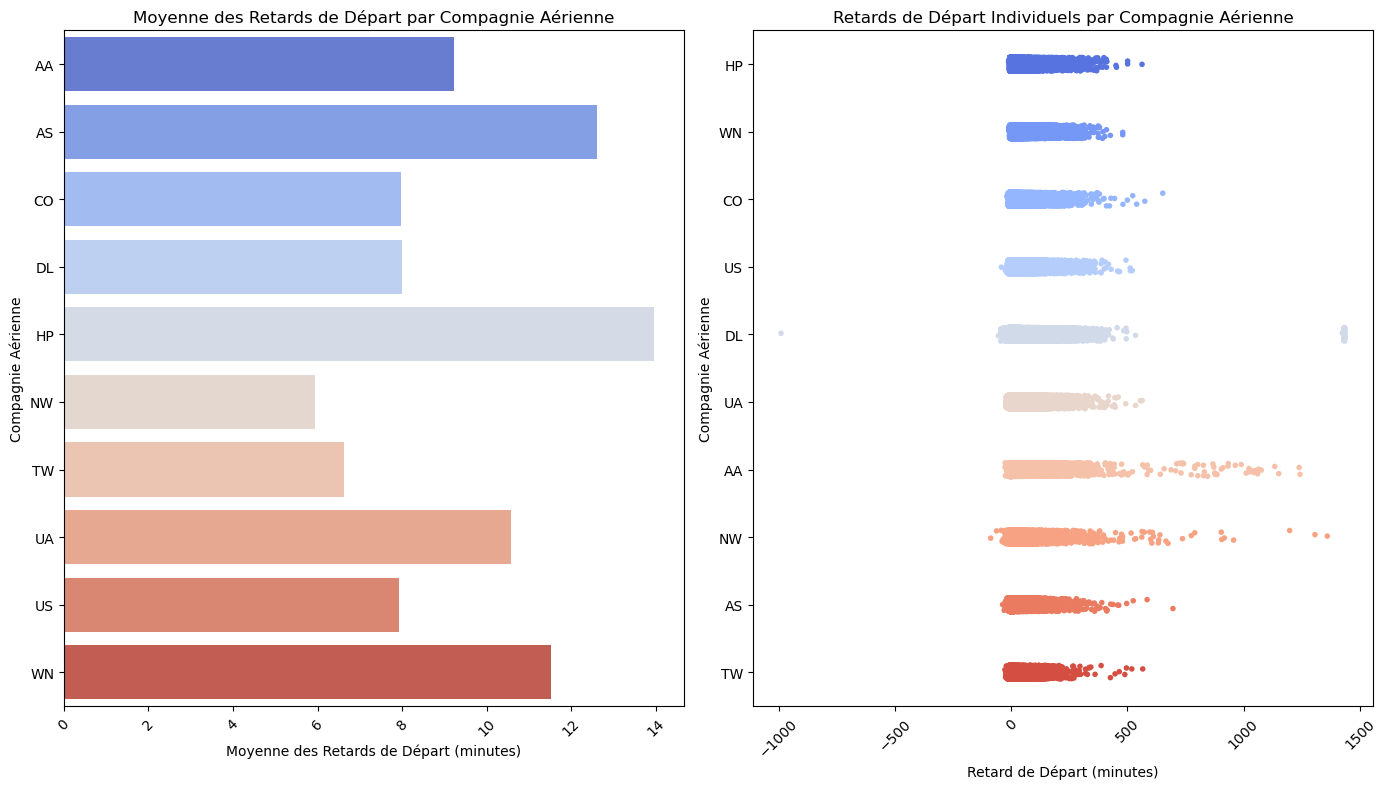

In [61]:
# Calculer la moyenne des retards pour chaque compagnie aérienne
moyenne_retards = data_clean.groupby('UniqueCarrier')['DepDelay'].mean().reset_index()
moyenne_retards.columns = ['UniqueCarrier', 'MoyenneRetard']

# Fusionner avec le DataFrame lignes_aeriennes pour obtenir les noms complets des lignes aériennes
moyenne_retards = pd.merge(moyenne_retards, lignes_aeriennes, left_on='UniqueCarrier', right_on='Code')

# Créer une figure pour les graphiques
plt.figure(figsize=(14, 8))

# Créer un barplot pour la moyenne des retards
plt.subplot(1, 2, 1)
sns.barplot(x='MoyenneRetard', y='UniqueCarrier', data=moyenne_retards, palette='coolwarm')
plt.title('Moyenne des Retards de Départ par Compagnie Aérienne')
plt.xlabel('Moyenne des Retards de Départ (minutes)')
plt.ylabel('Compagnie Aérienne')
plt.xticks(rotation=45)

# Créer un stripplot pour les valeurs individuelles des retards
plt.subplot(1, 2, 2)
sns.stripplot(x='DepDelay', y='UniqueCarrier', data=data_clean, palette='coolwarm', size=4, jitter=True)
plt.title('Retards de Départ Individuels par Compagnie Aérienne')
plt.xlabel('Retard de Départ (minutes)')
plt.ylabel('Compagnie Aérienne')
plt.xticks(rotation=45)

# Afficher les graphiques
plt.tight_layout()
plt.show()


* Malgré leur faible frequences de vol, HP et AS  ont les moyennes de retards les plus élevées. Cela pourrait indiquer des défis opérationnels spécifiques à ces compagnies, comme des hubs dans des aéroports congestionnés

* Bien que Trans World Airlines (TW) ait une moyenne de retard relativement faible, le nombre élevé d'outliers suggère une variabilité importante dans leurs opérations. Cela pourrait indiquer que, bien que la plupart des vols soient à l'heure, il y a une proportion significative de vols qui connaissent des retards importants.

* En général,malgré le nombre élevé de vol des cinq premières compagnies aériennes (WN, DL, UA, US, AA),Il ont une moyenne de retard  relativement modérée, suggérant une bonne gestion des retards malgré un grand volume d'opérations.

Moyenne générale des retards: 9.21
Moyenne des retards pour le groupe 1: 9.51
Moyenne des retards pour le groupe 2: 8.44
Disparité entre les moyennes: 1.07


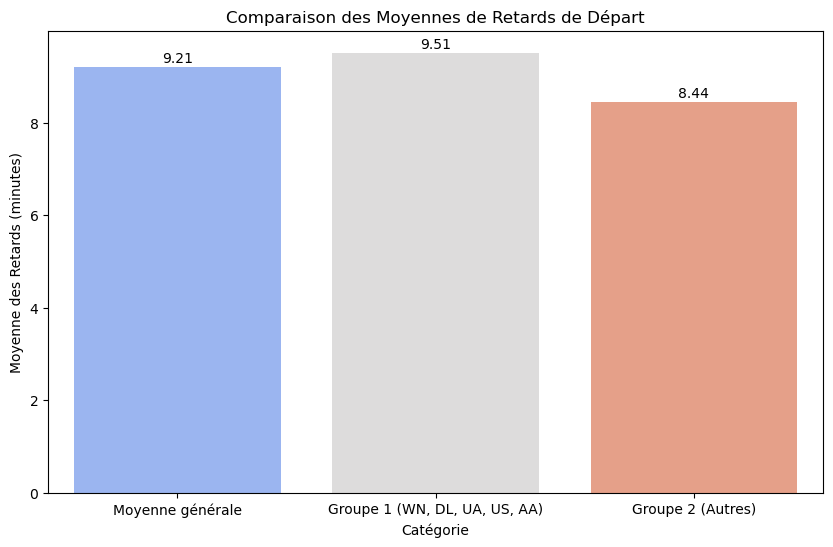

In [62]:
# Moyenne générale des retards
moyenne_generale = data_clean['DepDelay'].mean()

# Définition des groupes
groupe1 = ['WN', 'DL', 'UA', 'US', 'AA']
groupe2 = list(set(data_clean['UniqueCarrier']) - set(groupe1))

# Moyenne des retards pour chaque groupe
moyenne_groupe1 = data_clean[data_clean['UniqueCarrier'].isin(groupe1)]['DepDelay'].mean()
moyenne_groupe2 = data_clean[data_clean['UniqueCarrier'].isin(groupe2)]['DepDelay'].mean()

# Calcul de la disparité
disparite = moyenne_groupe1 - moyenne_groupe2

# Affichage des résultats
print(f'Moyenne générale des retards: {moyenne_generale:.2f}')
print(f'Moyenne des retards pour le groupe 1: {moyenne_groupe1:.2f}')
print(f'Moyenne des retards pour le groupe 2: {moyenne_groupe2:.2f}')
print(f'Disparité entre les moyennes: {disparite:.2f}')

# Préparation des données pour la visualisation
data = {
    'Catégorie': ['Moyenne générale', 'Groupe 1 (WN, DL, UA, US, AA)', 'Groupe 2 (Autres)'],
    'Moyenne des retards': [moyenne_generale, moyenne_groupe1, moyenne_groupe2]
}

df_moyennes = pd.DataFrame(data)

# Création du diagramme en barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Catégorie', y='Moyenne des retards', data=df_moyennes, palette='coolwarm')

# Ajout des valeurs au-dessus des barres
for index, row in df_moyennes.iterrows():
    plt.text(index, row['Moyenne des retards'] + 0.1, round(row['Moyenne des retards'], 2), color='black', ha="center")

plt.title('Comparaison des Moyennes de Retards de Départ')
plt.ylabel('Moyenne des Retards (minutes)')
plt.xlabel('Catégorie')

plt.show()

On peut conclure que les retards moyens se comportent de manière homogène parmi les compagnies aériennes (à l'exception de deux cas extrêmes). Ensuite, nous avons constaté que cette faible valeur est une conséquence de la grande proportion de vols qui décollent à l'heure. Cependant, de temps en temps, d'importants retards peuvent être enregistrés.

**Modélisation de la  distribution des retards de départ pour chaque companie aèrienne**

La modélisation de la distribution des retards pour chaque companie aèrienne se fait en déterminant les paramètres $a$ et $b$ du loi exponentiel.

le code suivant donne la distribution de retard pour chaque compagnie aèrienne.

Notez que la normalisation de la distribution implique que $∫f(x)dx=1$. Ici, nous n'avons pas une égalité stricte car la normalisation s'applique aux histogrammes mais pas à la fonction de modèle.

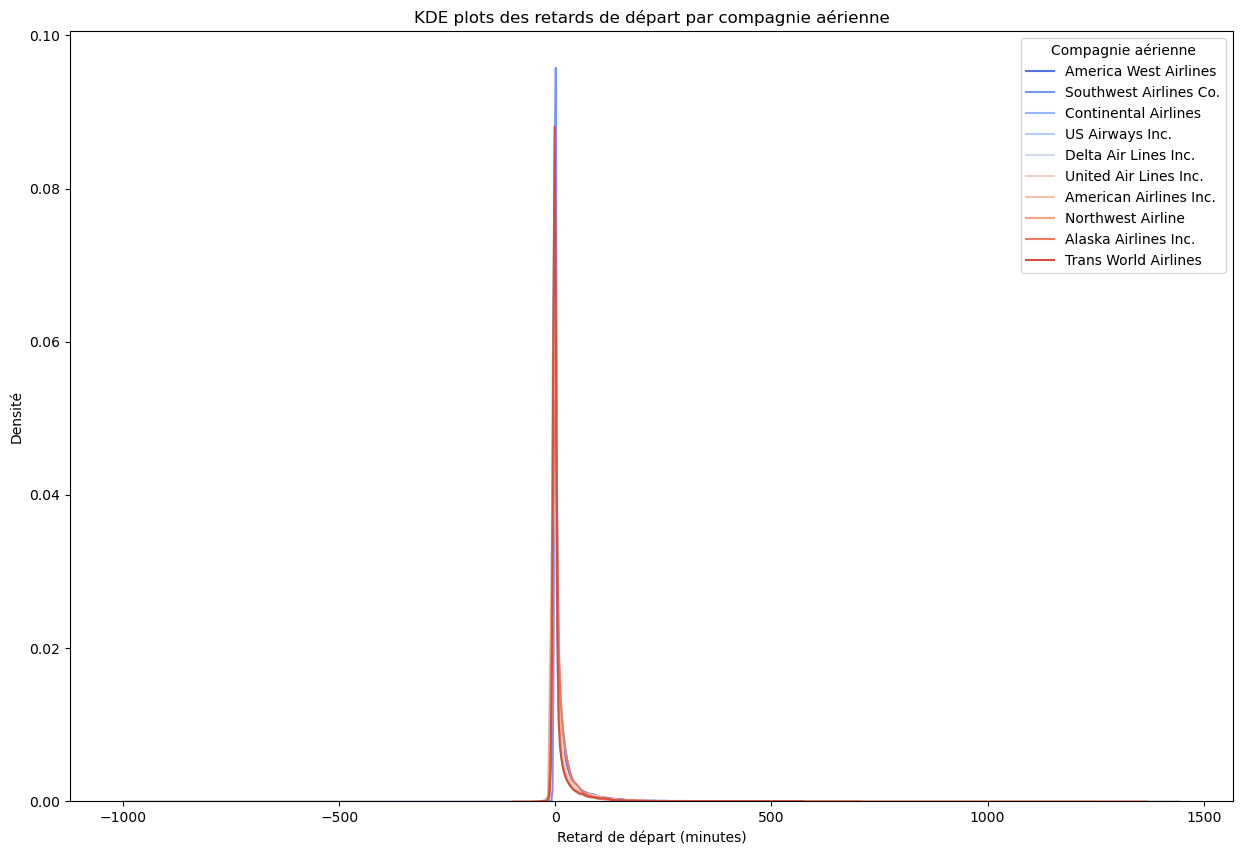

In [63]:
# Fusionner les données pour obtenir les noms complets des compagnies aériennes
data_clean = pd.merge(data_clean, lignes_aeriennes, left_on='UniqueCarrier', right_on='Code')

# Créer un KDE plot pour chaque compagnie aérienne
plt.figure(figsize=(15, 10))
sns.set_palette("coolwarm", n_colors=len(data_clean['ligne Aérien'].unique()))
for airline in data_clean['ligne Aérien'].unique():
    sns.kdeplot(data=data_clean[data_clean['ligne Aérien'] == airline]['DepDelay'], label=airline)
plt.title('KDE plots des retards de départ par compagnie aérienne')
plt.xlabel('Retard de départ (minutes)')
plt.ylabel('Densité')
plt.legend(title='Compagnie aérienne')
plt.show()

La relation $f(x)=aexp(−x/b)$ implique que les coefficients $a$ et $b$ seront corrélés avec $a∝1/b$ et donc, seule l'une de ces deux valeurs est nécessaire pour décrire les distributions. Enfin, en fonction de la valeur de soit $a$ soit $b$, il est possible d'établir un classement des compagnies.

En effet, le paramètre $a$ represente l'échelle ou l'amplitude initile de la distribution càd la hauteur.Alors que b indique la rapidité avec laquelle la fonction décroît. Plus $b$ est grand, plus la fonction diminue lentement.

Par conséquent, les compagnies aériennes avec une grande valeur de $𝑎$ ont tendance à être plus ponctuelles.et Une valeur plus grande de 
$b$ signifie que les retards sont plus fréquents et plus longs. Les compagnies aériennes avec des valeurs élevées de $b$ ont donc tendance à avoir des retards plus importants.

Donc en estimant l'un de ces paramètres on peut classer les companies selon leur ponctualité.

## <font color='  #d98880'>3.3.Effet de  l'aèroport sur  le retard de départ 

Dans cette section nous allons approuver la corrélation entre l'aèroport de départ `Origin`,l'aèroport de destination `Dest`, la compagnie aèrienne`UniqueCarrier` , et le retard de départ `DepDelay`

**Nombre des aèroports dans la data**

In [64]:
# Combiner les colonnes Origin et Dest pour obtenir tous les codes d'aéroports
all_airports = pd.concat([data_clean['Origin'], data_clean['Dest']])

# Obtenir les codes d'aéroports uniques
unique_airports = all_airports.unique()

# Compter le nombre d'aéroports uniques
num_unique_airports = len(unique_airports)

print(f"Le nombre d'aéroports uniques dans les données est : {num_unique_airports}")


Le nombre d'aéroports uniques dans les données est : 201


**Impact du nombre de vol pour chaque aèroport sur le retard de départ**

Le code suivant nous permet de grouper les aèroport selon le nombre de vol effectué ainsi que  de visulaiser la zone geograpghique couvréé par les aèroports 

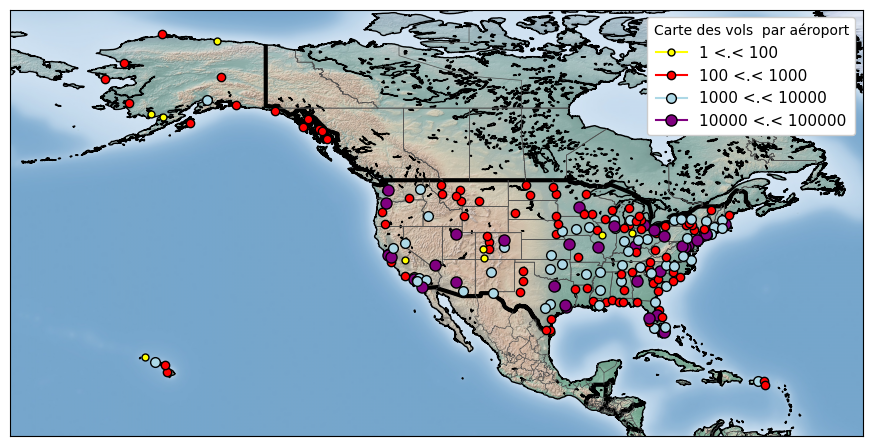

In [65]:
# Compter le nombre de vols au départ de chaque aéroport
count_flights = data_clean['Origin'].value_counts()

# Créer une nouvelle figure pour le tracé de la carte avec une taille de 11x11 pouces
plt.figure(figsize=(11, 11))

# Définir les propriétés des marqueurs et des étiquettes
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']  # Couleurs des marqueurs
size_limits = [1, 100, 1000, 10000, 100000]  # Limites des tailles des marqueurs
labels = []  # Étiquettes pour les différentes catégories de vols

# Créer les étiquettes en fonction des limites de taille
for i in range(len(size_limits) - 1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i + 1]))

# Créer une carte avec la bibliothèque Basemap
#llcrnrlon: Longitude du coin inférieur gauche de la carte.
#urcrnrlon:Longitude du coin supérieur droit de la carte
#llcrnrlat:Latitude du coin inférieur gauche de la carte
#urcrnrlat:Latitude du coin supérieur droit de la carte.
#lat_0:Latitude centrale de la carte.
#lon_0:Longitude centrale de la carte.
map = Basemap(resolution='i', llcrnrlon=-180, urcrnrlon=-50, llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0)

# Ajouter un ombrage pour le relief
map.shadedrelief()

# Tracer les contours des côtes
map.drawcoastlines()

# Tracer les frontières des pays avec une largeur de ligne de 3 points
map.drawcountries(linewidth=3)

# Tracer les frontières des états avec une couleur définie
map.drawstates(color='0.3')

# Filtrer les aéroports pour n'inclure que ceux présents dans count_flights
filtered_airports = airports[airports['IATA_CODE'].isin(count_flights.index)]

# Placer les aéroports sur la carte en fonction du nombre de vols
for index, (code, y, x) in filtered_airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)  # Convertir les coordonnées en coordonnées de carte
    # Trouver la taille du marqueur en fonction du nombre de vols
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    # Tracer le marqueur avec les propriétés définies
    map.plot(x, y, marker='o', markersize=ind + 5, markeredgewidth=1, color=colors[ind],
             markeredgecolor='k', label=labels[ind])

# Supprimer les étiquettes en double et définir leur ordre
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

# S'assurer que les clés existent dans by_label avant de les ajouter à new_label
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000')
new_label = OrderedDict((key, by_label[key]) for key in key_order if key in by_label)

# Ajouter une légende au graphique
plt.legend(new_label.values(), new_label.keys(), loc=1, prop={'size': 11},
           title='Carte des vols  par aéroport', frameon=True, framealpha=1)

# Afficher le graphique
plt.show()


D'après la cartographie suivante il est clair qu'il y a une hétérogénité dans le nombre de vol effectué entre les aèroports .

Cette classification des aèroports selon le nombre de vol peut suggérer une certaine relation entre l'aèroport et le retard de départ.

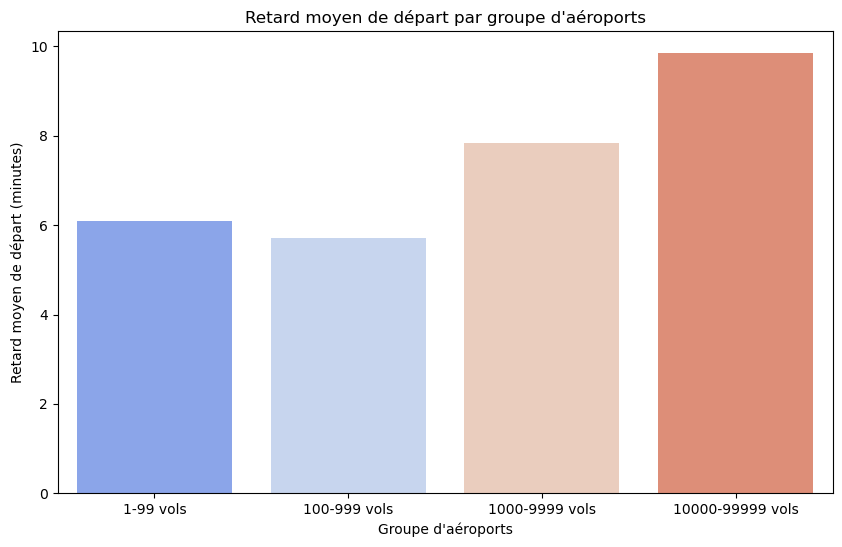

In [66]:
# Compter le nombre de vols au départ de chaque aéroport
count_flights = data_clean['Origin'].value_counts()

# Définir les propriétés des marqueurs et des étiquettes
size_limits = [1, 100, 1000, 10000, 100000]  # Limites des tailles des marqueurs
labels = ["1-99 vols", "100-999 vols", "1000-9999 vols", "10000-99999 vols"]  # Étiquettes pour les différentes catégories de vols

# Filtrer les aéroports pour n'inclure que ceux présents dans count_flights
filtered_airports = airports[airports['IATA_CODE'].isin(count_flights.index)]

# Calculer le retard moyen pour chaque groupe
grouped_airports = {}
for i in range(len(size_limits) - 1):
    group = filtered_airports[filtered_airports['IATA_CODE'].isin(
        count_flights[(count_flights >= size_limits[i]) & (count_flights < size_limits[i + 1])].index
    )]
    grouped_airports[labels[i]] = data_clean[data_clean['Origin'].isin(group['IATA_CODE'])]['DepDelay'].mean()

# Convertir le dictionnaire en DataFrame pour faciliter la visualisation
df_grouped_airports = pd.DataFrame(list(grouped_airports.items()), columns=['Groupe', 'Retard moyen'])

# Créer un diagramme à barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Groupe', y='Retard moyen', data=df_grouped_airports, palette="coolwarm")
plt.title("Retard moyen de départ par groupe d'aéroports")
plt.xlabel("Groupe d'aéroports")
plt.ylabel("Retard moyen de départ (minutes)")
plt.show()


* Un loi naturel qui se deduit est que les aèroport qui sont caractérisés par un nombre de vol élévé vont systèmatiquement avoir un nombre  moyen de retard plus important vue le grand nombre d'opération.

* On remarque que la différence entre le  nombre moyen de vol pour chaque catégorie est presque constant sauf pour la première.

* la première catagorie d'aèroport qui effectue le plus bas nombre de vol est caractérisé par un retard moyen un peu plus important que la deuxième catégorie. ce qui suggère qu'il a des autres facteurs externes qui affecte la relation entre l'aèroport et le retard de départ

**Relation entre l'aèroport d'origine , la compagnie aèrienne et la retard de depart**

Dans cette section,nous allons examiner les variations des retards en fonction de l'aéroport d'origine et pour chaque compagnie aérienne.

La première étape consiste donc à déterminer les retards moyens par aéroport.

In [67]:
# Calculer les retards moyens pour chaque combinaison aéroport-compagnie aérienne
airport_carrier_delays = data_clean.groupby(['Origin', 'UniqueCarrier'])['DepDelay'].mean().unstack()

# Vérifier la taille de la table de données
print(airport_carrier_delays.shape)

(200, 10)


Dans l'étape suivante vu le nombre des aeroports est très grand (200) on partitioner la visualisation de la moyenne de retard pour chaque companie et par aèroport sur deux heatmaps

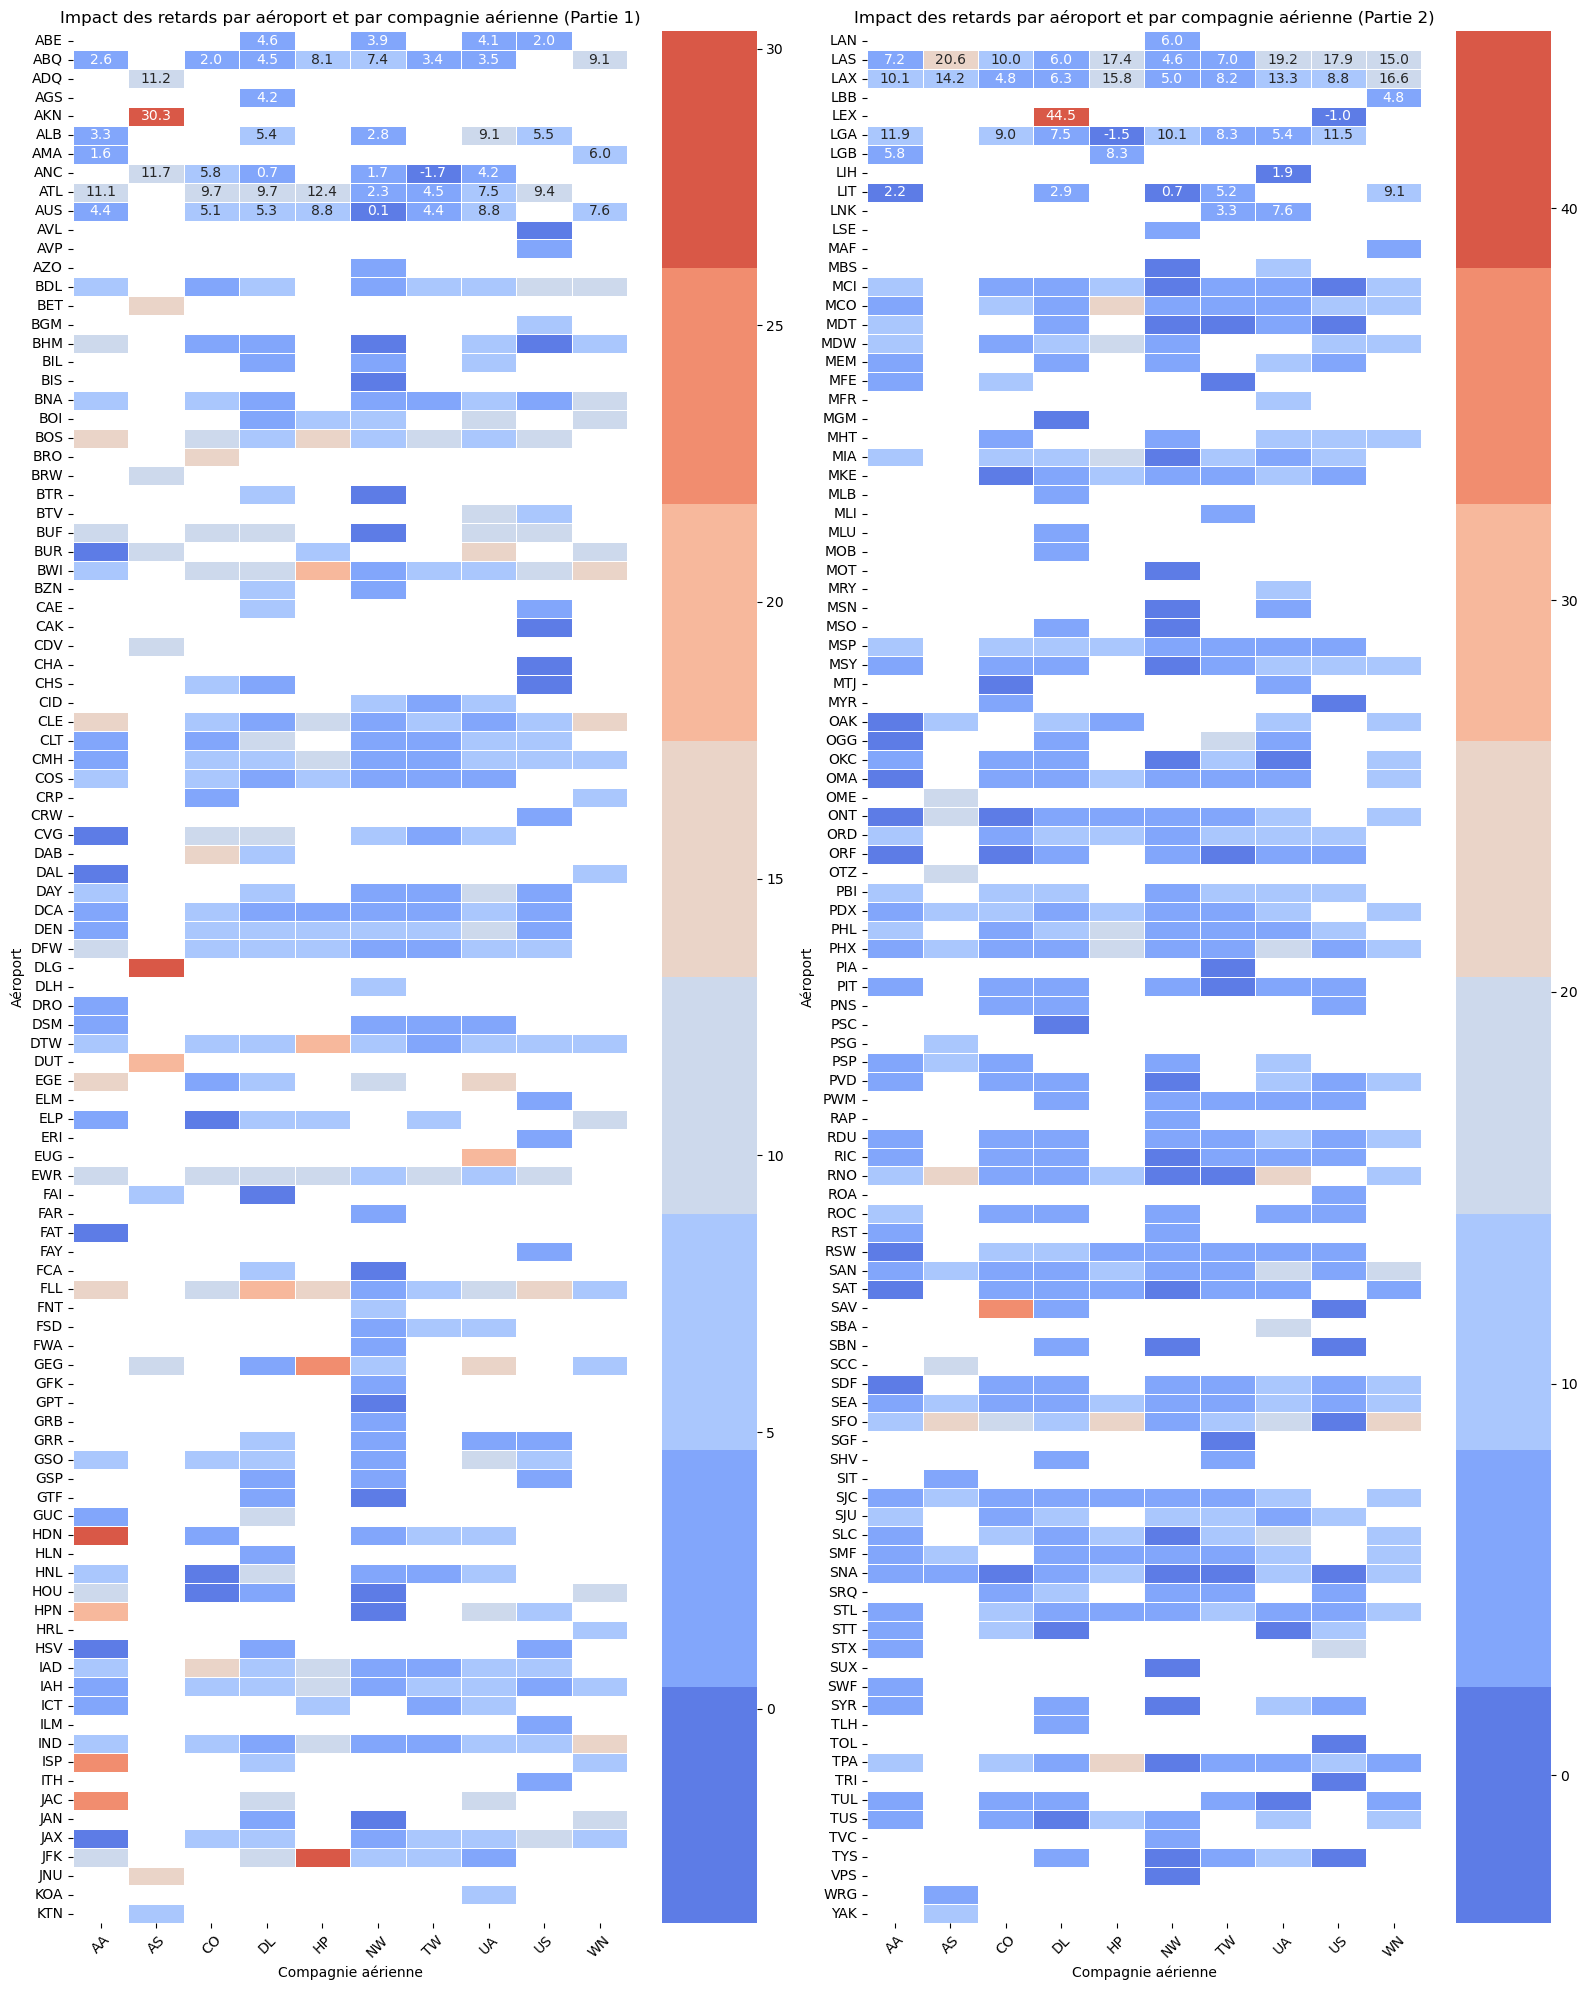

In [68]:
# Créer une palette de couleurs avec 8 couleurs distinctes
palette = sns.color_palette("coolwarm", 8)

# Diviser la table en deux sous-ensembles pour les heatmaps
split_point = len(airport_carrier_delays) // 2
subset1 = airport_carrier_delays.iloc[:split_point]
subset2 = airport_carrier_delays.iloc[split_point:]

# Créer une figure avec une taille ajustée pour deux heatmaps côte à côte
plt.figure(figsize=(16, 20))

# Créer le premier heatmap
ax1 = plt.subplot(1, 2, 1)
sns.heatmap(subset1, cmap=palette, annot=True, fmt=".1f", linewidths=.5, ax=ax1)
ax1.set_title("Impact des retards par aéroport et par compagnie aérienne (Partie 1)")
ax1.set_xlabel("Compagnie aérienne")
ax1.set_ylabel("Aéroport")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Créer le deuxième heatmap
ax2 = plt.subplot(1, 2, 2)
sns.heatmap(subset2, cmap=palette, annot=True, fmt=".1f", linewidths=.5, ax=ax2)
ax2.set_title("Impact des retards par aéroport et par compagnie aérienne (Partie 2)")
ax2.set_xlabel("Compagnie aérienne")
ax2.set_ylabel("Aéroport")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()
plt.show()


Comme discuté dans la section précédente, on observe que le nombre moyen des retards de départ pour les compagnies AS et HP est plus élevé par rapport aux autres compagnies. De plus, ce grand retard moyen pour ces deux compagnies est dû à certains aéroports d'origine. Par exemple, on remarque que les aéroports de **DLG, AKN, JNU** et **DUT**, qui ne se connectent qu'avec la compagnie **AS**, se caractérisent par des retards moyens élevés par rapport à l'aéroport FAI qui se connecte avec AS et d'autres compagnies et qui a un nombre moyen de retards de départ acceptable.

On observe aussi que l'aéroport **SEA** (dans la heatmap de droite) se caractérise par un intervalle de retards sans valeurs élevées pour toutes les compagnies avec lesquelles il est en relation.

Nous pouvons donc déduire de ces observations qu'il existe une grande variabilité dans les retards moyens, à la fois entre les différents aéroports et entre les différentes compagnies aériennes. Cela est important car cela implique que pour modéliser avec précision les retards, il sera nécessaire d'adopter un modèle spécifique à la compagnie aérienne et à l'aéroport d'origine.

**Relation entre le vol (aèroport d'origine -> aèroport de destination) , la compagnie aèrienne et la retard de depart**

Nous allons maintenant ajouter un niveau de granularité. Nous allons essayer de prouver l'existance de relations entre les vols, la compagnie aèrienne et le retard de départ.
Pour ceci nous allons considérer le cas d'une seule compagnies aèrienne **AA:American Airline** qui appartient au premier groupe qui monopolise le marché et qui est caractérise par des relations multiples avec les aèroports

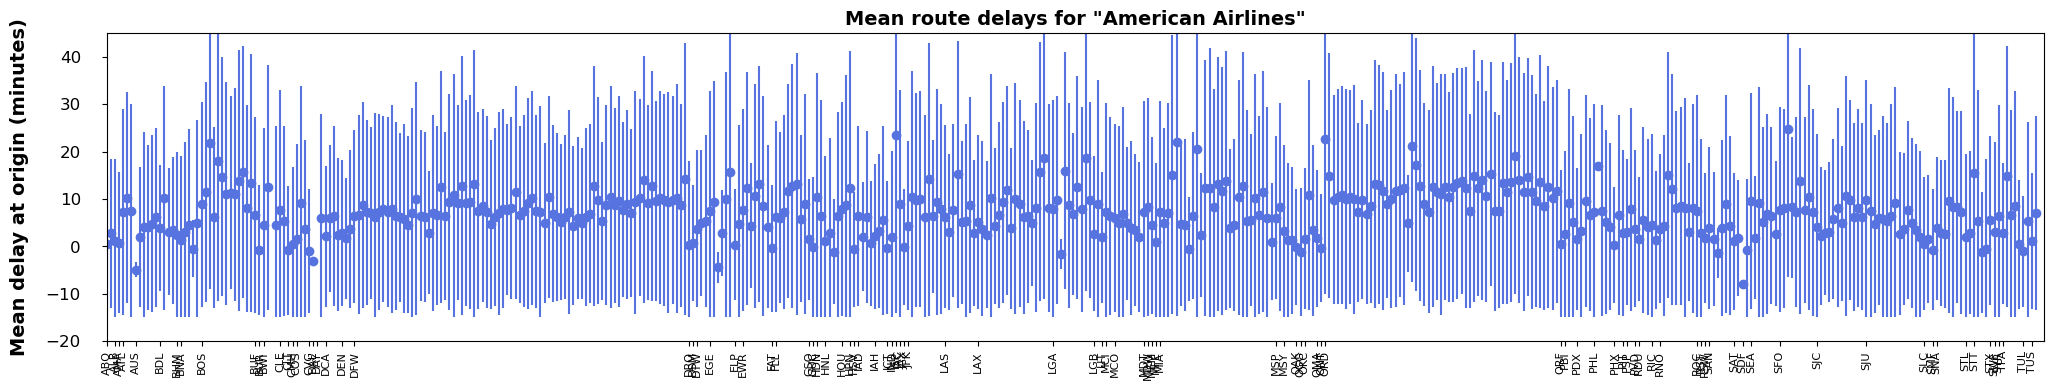

In [69]:
# Sélectionner la compagnie American Airlines et créer un sous-ensemble du dataframe principal
carrier = 'AA'
df1 = data_clean[data_clean['UniqueCarrier'] == carrier][['Origin', 'Dest', 'DepDelay']]

# Collecter les trajets et lister les retards pour chacun d'eux
trajet = dict()
for ind, col in df1.iterrows():
    if pd.isnull(col['DepDelay']): continue
    route = str(col['Origin']) + '-' + str(col['Dest'])
    if route in trajet.keys():
        trajet[route].append(col['DepDelay'])
    else:
        trajet[route] = [col['DepDelay']]

# Transposer le dictionnaire en liste pour trier les trajets par origines
liste_trajet = []
for key, value in trajet.items():
    liste_trajet.append([key, value])
liste_trajet.sort()

mean_val = []
std_val = []
x_label = []

i = 0
for route, liste_retards in liste_trajet:
    # Définir les labels comme les aéroports d'origine
    index = route.split('-')[0]
    x_label.append(lignes_aeriennes.get(index, index))  # Utiliser le nom de l'aéroport ou le code si non trouvé
    # Mettre une limite sur les retards pour éviter que les valeurs élevées prennent trop de poids
    trajet2 = [min(90, s) for s in liste_retards]
    # Calculer la moyenne et les écarts-types
    mean_val.append(np.mean(trajet2))
    std_val.append(np.std(trajet2))
    i += 1

# Tracer le graphique
fig, ax = plt.subplots(figsize=(25, 4))
std_min = [max(0, min(15 + mean_val[i], abs(s))) for i, s in enumerate(std_val)]

ax.errorbar(list(range(i)), mean_val, yerr=[std_min, std_val], fmt='o')
ax.set_title('Mean route delays for "{}"'.format('American Airlines'), fontsize=14, weight='bold')
plt.ylabel('Mean delay at origin (minutes)', fontsize=14, weight='bold', labelpad=12)

# Définir les plages et les positions des ticks
imin, imax = 0, len(x_label)
plt.xlim(imin, imax)
plt.ylim(-20, 45)
liste_ticks = [imin]
for j in range(imin + 1, imax):
    if x_label[j] == x_label[j - 1]: continue
    liste_ticks.append(j)

# Définir les paramètres des ticks
ax.set_xticks(liste_ticks)
ax.set_xticklabels([x_label[int(x)] for x in ax.get_xticks()], rotation=90, fontsize=8)
plt.setp(ax.get_yticklabels(), fontsize=12, rotation=0)
ax.tick_params(axis='y', which='major', pad=15)

plt.show()

cette figure présente les retrds moyens pour **AA** selon l'aèroport de départ et la destination.Les barres d'erreur associées aux différents trajets correspondent aux écarts-types. Dans cet exemple, on peut constater que pour un aéroport d'origine donné, les retards varieront en fonction de la destination. 

## <font color='  #d98880'>3.4.Effet du temps de départ

Considerant le cas d'une companie spécifique et d'un aèroport , on va découvrir l'effet du temps de départ sur le delay du départ 

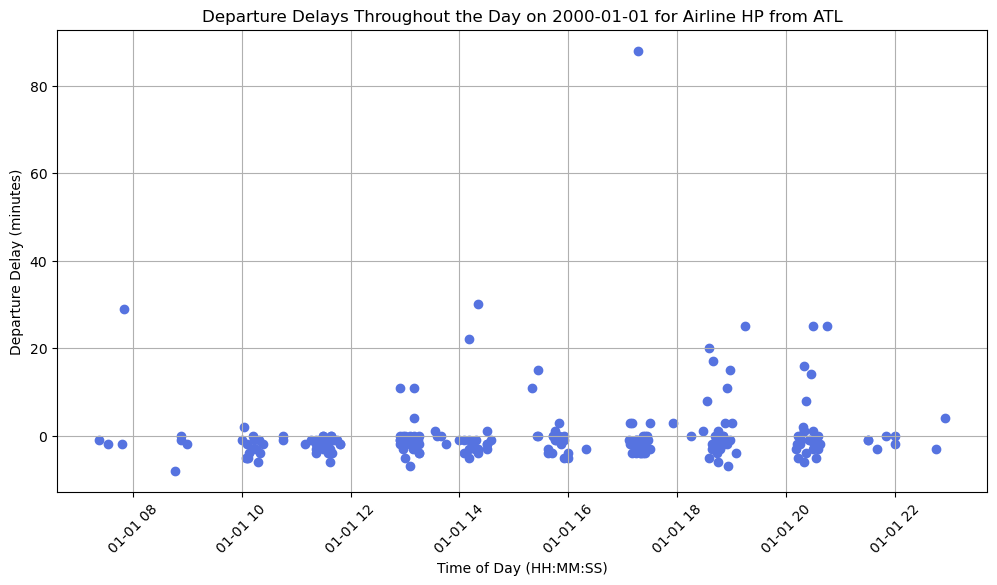

In [73]:
# Filter data for the specific day
specific_day = data_clean[data_clean['Date']== '2000-01-01']

# Filter data for specific airline 
specific_airline = specific_day[specific_day['UniqueCarrier'] == 'TW']

# Filter data for specific origin (e.g., 'ATL')
specific_origin = specific_airline[specific_airline['Origin'] == 'STL']

# Convert 'DepTime' to datetime
specific_origin['CRSDepTime'] = pd.to_datetime(specific_origin['CRSDepTime'], format='%H:%M:%S')

plt.figure(figsize=(12, 6))
plt.scatter(specific_origin['CRSDepTime'], specific_origin['DepDelay'], marker='o')
plt.xlabel('Time of Day (HH:MM:SS)')
plt.ylabel('Departure Delay (minutes)')
plt.title('Departure Delays Throughout the Day on 2000-01-01 for Airline HP from ATL')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

On voit une certaines variabilité du retard de depart le long de la journée

## <font color='  #d98880'>3.4.Relation entre l'avion utilisé pour le vol et le retard de départ

Nous allons étudié la relation entre l'avion utilisé pour le vol  `TailNum` et le retard de départ

Nous allons d'abord calculer le nombre d'avion utilisé dans tous les vols

In [96]:
# Calculer les valeurs distinctes de TailNum
valeurs_distinctes_tailnum = data_clean['TailNum'].unique()
print("Nombre d'avion totale est",len(valeurs_distinctes_tailnum))

Nombre d'avion totale est 3715


Nous allons visualiser le nombre d'avion utilisé par chaque compagnie aèrienne

In [97]:
# Nombre d'avion utilisé par compagnie aérienne et compter les numéros de queue distincts
tailnum_par_compagnie = data_clean.groupby('UniqueCarrier')['TailNum'].nunique()
tailnum_par_compagnie

UniqueCarrier
AA    695
AS     90
CO    356
DL    585
HP    125
NW    386
TW    184
UA    594
US    386
WN    314
Name: TailNum, dtype: int64

**Retard moyen de dépard selon les numéro de queue utilisé (TailNum) pour une  compagnie aèrienne spécifique .**

On va choisir pour cela, les 2 companies aèriennes **AS** et **AA** . Ces deux companies occupent des parts différentes du marché et leur distribution du retrd de départ ne se caractérise pas pas des outliers de valeurs grande .Nous avons fait ces choix attentionnellement afin que les résultats ne soit pas biasées .

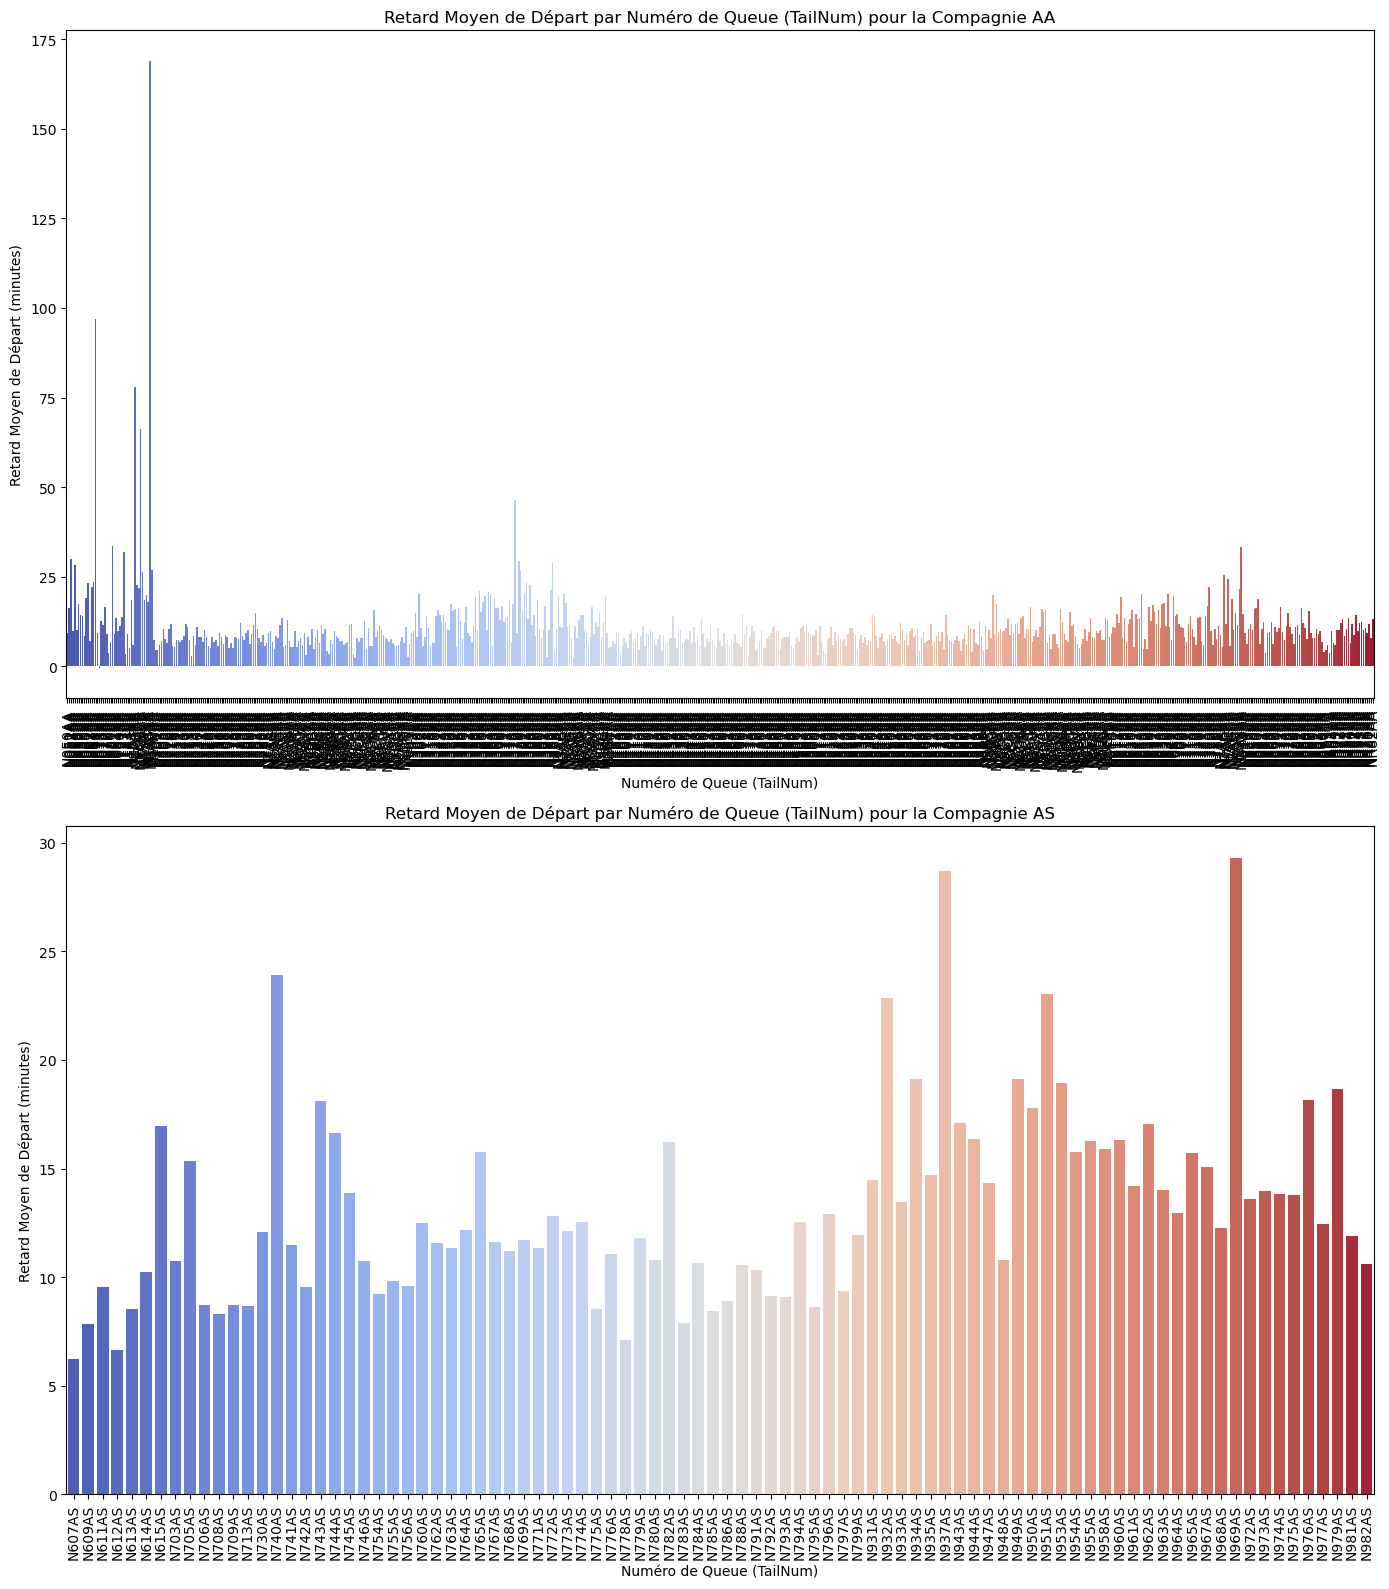

In [98]:
# Filtrer les données pour les compagnies aériennes spécifiques (AA et AS)
data_clean_aa = data_clean[data_clean['UniqueCarrier'] == 'AA']
data_clean_as = data_clean[data_clean['UniqueCarrier'] == 'AS']

# Calculer le retard moyen de départ pour chaque numéro de queue (TailNum) pour AA
moyenne_retard_par_tailnum_aa = data_clean_aa.groupby('TailNum')['DepDelay'].mean().reset_index()
moyenne_retard_par_tailnum_aa.columns = ['TailNum', 'MeanDepDelay']

# Calculer le retard moyen de départ pour chaque numéro de queue (TailNum) pour AS
moyenne_retard_par_tailnum_as = data_clean_as.groupby('TailNum')['DepDelay'].mean().reset_index()
moyenne_retard_par_tailnum_as.columns = ['TailNum', 'MeanDepDelay']

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

# Plot pour la compagnie AA
sns.barplot(ax=axes[0], x='TailNum', y='MeanDepDelay', data=moyenne_retard_par_tailnum_aa, palette='coolwarm')
axes[0].set_title('Retard Moyen de Départ par Numéro de Queue (TailNum) pour la Compagnie AA')
axes[0].set_xlabel('Numéro de Queue (TailNum)')
axes[0].set_ylabel('Retard Moyen de Départ (minutes)')
axes[0].tick_params(axis='x', rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité

# Plot pour la compagnie AS
sns.barplot(ax=axes[1], x='TailNum', y='MeanDepDelay', data=moyenne_retard_par_tailnum_as, palette='coolwarm')
axes[1].set_title('Retard Moyen de Départ par Numéro de Queue (TailNum) pour la Compagnie AS')
axes[1].set_xlabel('Numéro de Queue (TailNum)')
axes[1].set_ylabel('Retard Moyen de Départ (minutes)')
axes[1].tick_params(axis='x', rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()

# Afficher le plot
plt.show()


Les 2 plots une grande variabilité entre les retards de départ de chaque numéro de queue pour les deux plots. Donc le variable **TailNum** joue un role significatif dans les retards de départ.

**Retard de dépard moyen pour chaque vol(origine _destination) et pour chaque numéro de queue pour une companie aèrienne spécifique**

L'idée est de découvrir s'il existe une grande corrélation entre l'allocation du queue et le vol. 

Dans ce qui suit la fonction pour calaculer la corrélation entre le vol et le numéro de queue pour chaque compagnie aèrienne 

In [110]:
def calculate_correlation(data, airline):
    # Filtrer les données pour la compagnie aérienne spécifique
    data_airline = data[data['UniqueCarrier'] == airline]

    # Créer une variable combinée "Vol" à partir des colonnes "Origin" et "Dest"
    data_airline['Vol'] = data_airline['Origin'] + '-' + data_airline['Dest']

    # Initialiser les encodeurs de labels
    le_vol = LabelEncoder()
    le_tailnum = LabelEncoder()

    # Convertir les variables catégorielles "Vol" et "TailNum" en représentations numériques
    data_airline['Vol_encoded'] = le_vol.fit_transform(data_airline['Vol'])
    data_airline['TailNum_encoded'] = le_tailnum.fit_transform(data_airline['TailNum'])

    # Calculer la corrélation entre "Vol_encoded" et "TailNum_encoded"
    correlation = data_airline['Vol_encoded'].corr(data_airline['TailNum_encoded'])

    return correlation



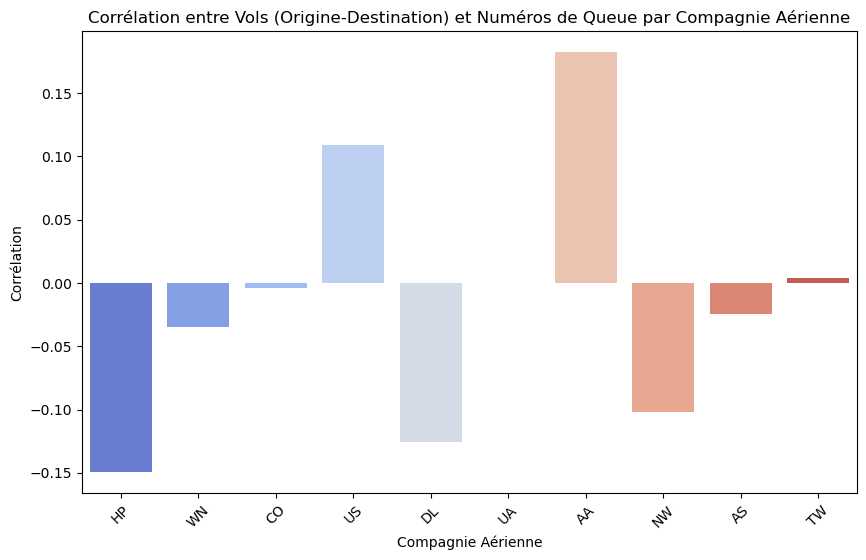

In [112]:
# Calculer les corrélations pour chaque compagnie aérienne
correlation_results = {}
compagnies_aeriennes = data_clean['UniqueCarrier'].unique()
for airline in compagnies_aeriennes:
    correlation_results[airline] = calculate_correlation(data_clean, airline)

# Créer un DataFrame à partir des résultats
df_correlation = pd.DataFrame(list(correlation_results.items()), columns=['Compagnie Aérienne', 'Corrélation'])

# Tracer les valeurs de corrélation
plt.figure(figsize=(10, 6))
sns.barplot(x='Compagnie Aérienne', y='Corrélation', data=df_correlation, palette='coolwarm')
plt.title('Corrélation entre Vols (Origine-Destination) et Numéros de Queue par Compagnie Aérienne')
plt.xlabel('Compagnie Aérienne')
plt.ylabel('Corrélation')
plt.xticks(rotation=45)
plt.show()

On conclut qu'i n'y a pas une relation vraiment significatif entre les vols et le Numéros de queue. 

Le code suivnat visualise une allocation des avions pour les vols pour la compagnie American Airline.

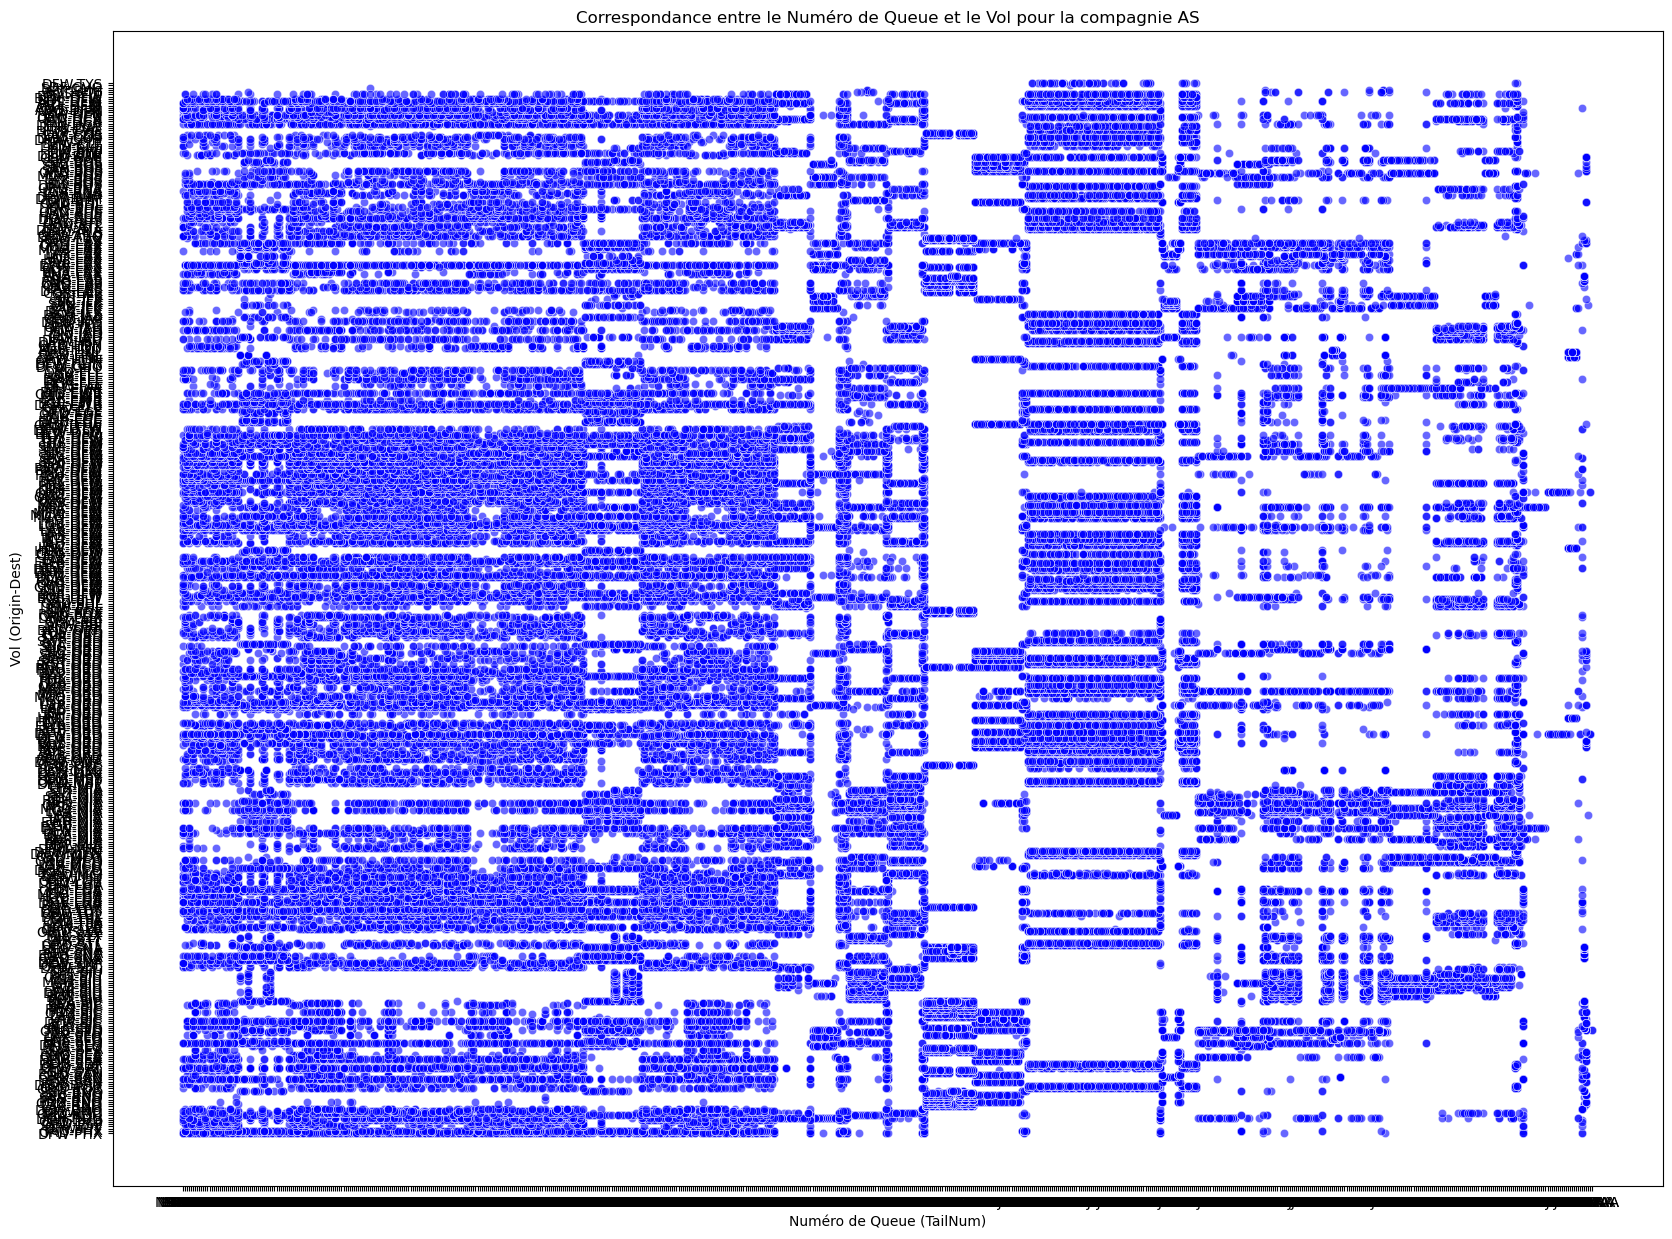

In [62]:
# Filtrer les données pour la compagnie aérienne spécifique (AS)
data_clean_as = data_clean[data_clean['UniqueCarrier'] == 'AA']

# Créer une représentation unique des paires de vols
data_clean_as['Vol'] = data_clean_as['Origin'] + '-' + data_clean_as['Dest']

# Obtenir les paires de vols uniques
unique_vols = data_clean_as['Vol'].unique()

# Créer un dictionnaire pour mapper chaque paire de vols unique à un entier
vol_mapping = {vol: i for i, vol in enumerate(unique_vols)}

# Ajouter une colonne mappée pour les vols
data_clean_as['Vol_mapped'] = data_clean_as['Vol'].map(vol_mapping)

# Visualiser les résultats avec un scatter plot
plt.figure(figsize=(20, 15))
plt.scatter(data_clean_as['TailNum'], data_clean_as['Vol_mapped'], alpha=0.6, c='blue', edgecolors='w', linewidth=0.5)
plt.xlabel('Numéro de Queue (TailNum)')
plt.ylabel('Vol (Origin-Dest)')
plt.title('Correspondance entre le Numéro de Queue et le Vol pour la compagnie AS')
plt.yticks(ticks=range(len(unique_vols)), labels=unique_vols, rotation=0)
plt.show()


 On conclut que l'allocation des avions ne dépend pas majoritairement de l'aèroport d'origine et de départ mais par d'autre facteurs.Donc le variable TailNum est informatif pour la prédiction des retards de départ

## <font color='  #d98880'>3.5.Temps de roulage avantle décollage at retard de départ

In [79]:
# Calculer la corrélation entre TaxiIn et le retard de départ
correlation_taxiin_delay = data_clean['TaxiOut'].corr(data_clean['DepDelay'])

# Afficher la corrélation
print("Corrélation entre TaxiIn et retard de départ :", correlation_taxiin_delay)

Corrélation entre TaxiIn et retard de départ : 0.06024644020009758


On remarque que la corrélation entre TaxiIn et le retard de départ est très faible. Donc TaxiIn n'est pas parmi les variables pertinants pour estimer le retard de départ